### Importing the necessary libraries

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Data set loading

In [2]:
data = pd.read_csv("wind_dataset.csv")

In [3]:
df = data.copy()

In [4]:
dataset = data.copy()

# Descriptive statistics

In [37]:
data.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [6]:
dataset.isnull().sum() #mean()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

#### extracting the neumerical features and check how many  percent of values are missing

In [8]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

IND.1: 0.0093% missing value
T.MAX: 0.0945% missing value
IND.2: 0.0093% missing value
T.MIN: 0.1025% missing value
T.MIN.G: 0.0548% missing value


#### check for the distributions of this neumerical features

In [9]:
dff = data.copy()

In [10]:
dff.isnull().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

# Check for Outlires

<AxesSubplot:xlabel='WIND'>

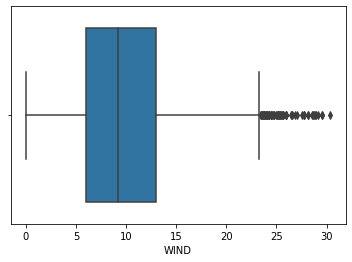

In [39]:
sns.boxplot(data['WIND'])

#### Conclusions:
outlier detected

<AxesSubplot:xlabel='RAIN'>

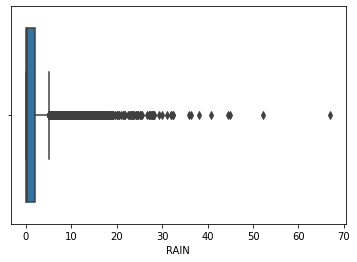

In [41]:
sns.boxplot(data['RAIN'])

#### Conclusions:
outlier detected

<AxesSubplot:xlabel='IND'>

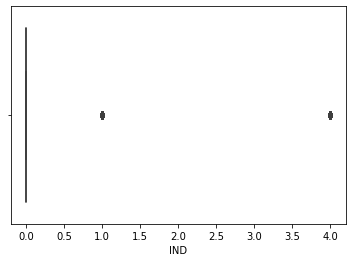

In [40]:
sns.boxplot(data['IND'])

### Conclusions:
    outlier detected

<AxesSubplot:xlabel='IND.1'>

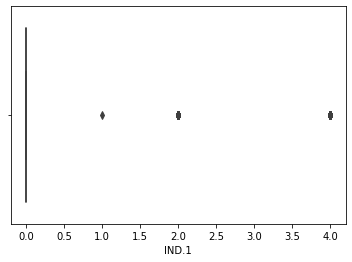

In [28]:
sns.boxplot(data['IND.1'])

<AxesSubplot:xlabel='IND.2'>

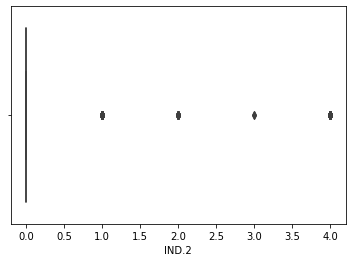

In [29]:
sns.boxplot(data['IND.2'])

<AxesSubplot:xlabel='T.MAX'>

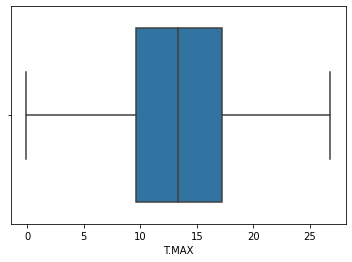

In [30]:
sns.boxplot(data['T.MAX'])

###### conclusions :
     > Right Skewed
     > outlier not present

<AxesSubplot:xlabel='T.MIN'>

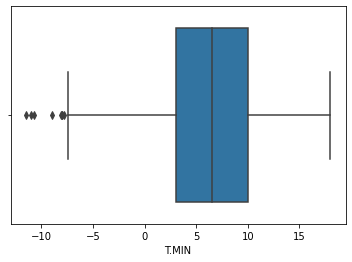

In [31]:
sns.boxplot(data['T.MIN'])

###### conclusions :
    >left Skewed
    > Outliers present

<AxesSubplot:xlabel='T.MIN.G'>

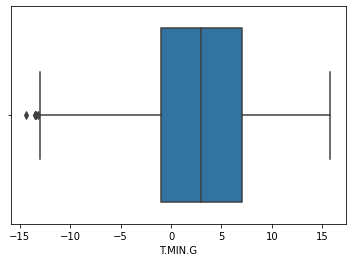

In [32]:
sns.boxplot(data['T.MIN.G']) 

##### conclusions :
    >left Skewed
    > Outliers present

## Check the Distribution of the Data

In [12]:
#klib is a Python library for importing, cleaning, analyzing and preprocessing data
import klib

<AxesSubplot:xlabel='T.MIN.G', ylabel='Density'>

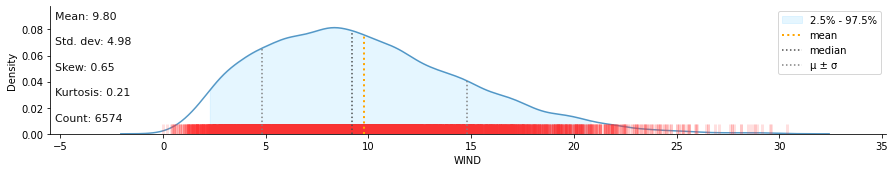

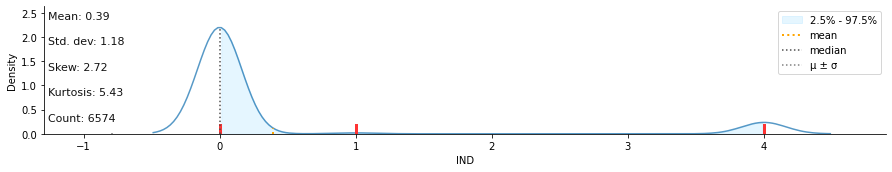

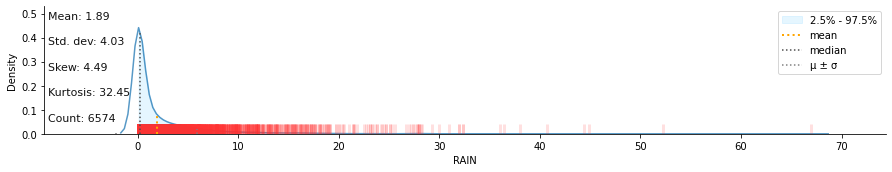

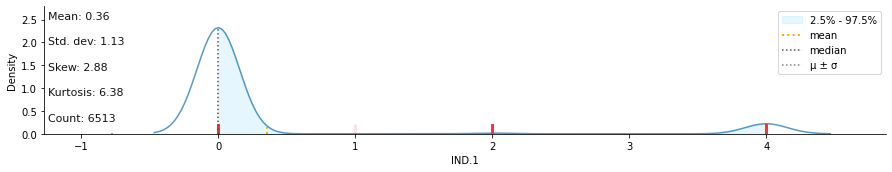

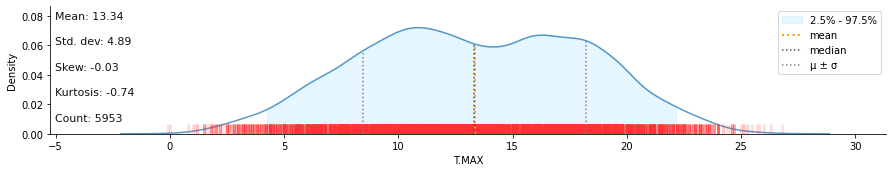

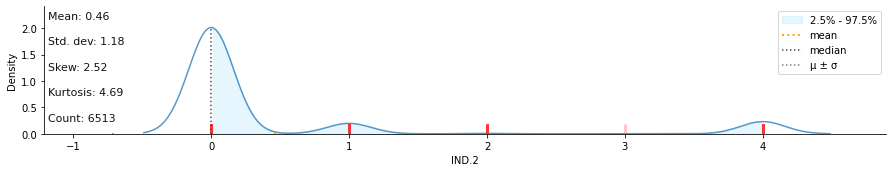

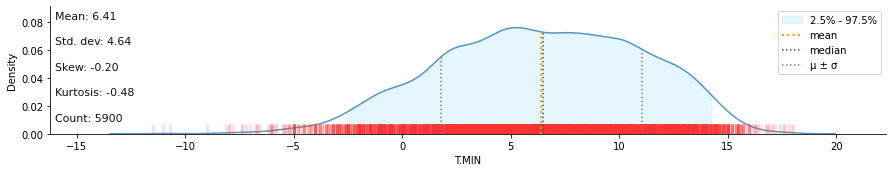

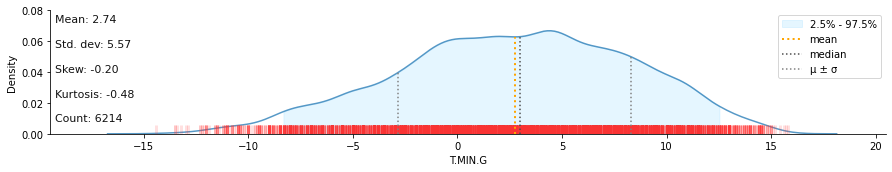

In [13]:
klib.dist_plot(data)  # returns a distribution plot for every numeric feature

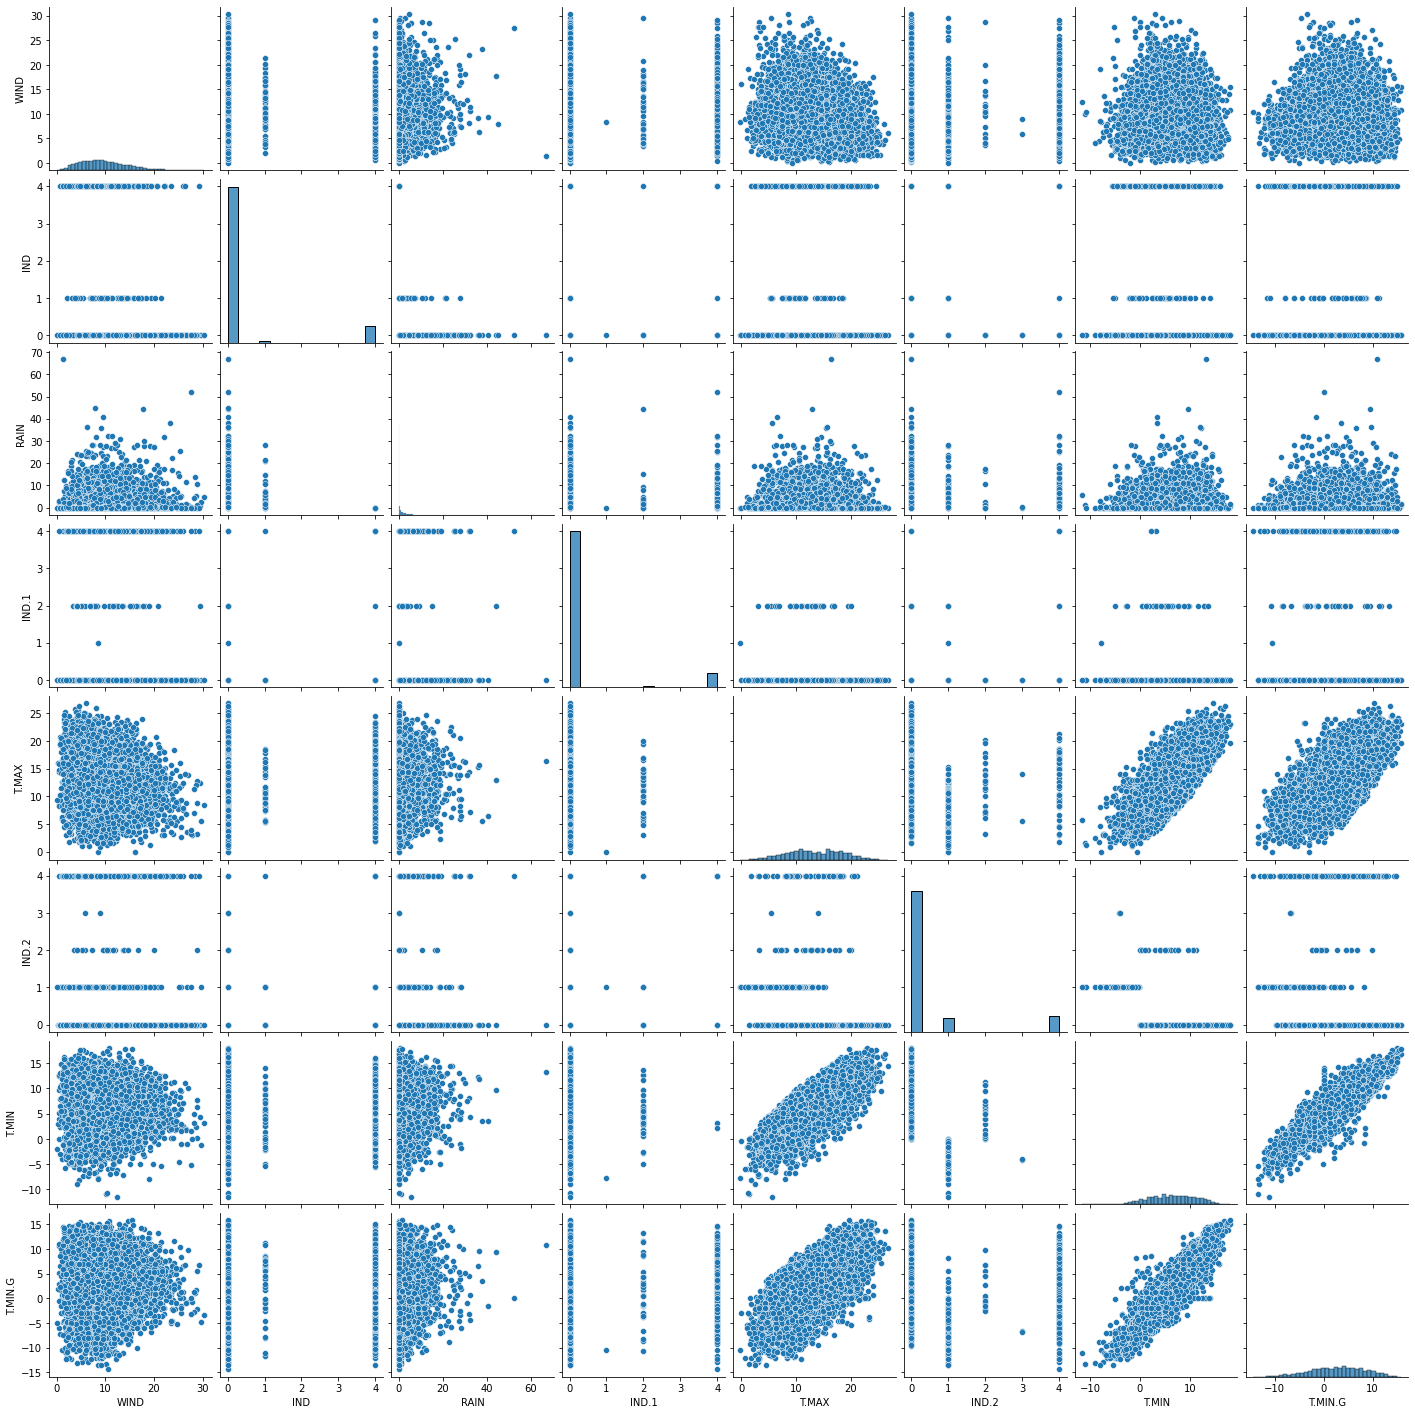

In [20]:
sns.pairplot(dff,diag_kind="hist")

#### conclusion :
    1.since neumerical columns are skewed and here we should go with median fillng technique 
    2. we can see some of the columns are positively corelated to each other like. "T.MIN" feature and 'T.MIN.G' feature and
       'T.MIN' and 'T.MAX'

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
WIND,1.00,-0.04,0.12,0.07,-0.24,0.05,-0.09,0.01
IND,-0.04,1.00,-0.15,-0.03,-0.08,-0.02,-0.05,-0.06
RAIN,0.12,-0.15,1.00,0.02,-0.04,0.01,0.01,0.03
IND.1,0.07,-0.03,0.02,1.00,-0.04,0.91,-0.03,-0.00
T.MAX,-0.24,-0.08,-0.04,-0.04,1.00,-0.25,0.79,0.68
IND.2,0.05,-0.02,0.01,0.91,-0.25,1.00,-0.54,-0.13
T.MIN,-0.09,-0.05,0.01,-0.03,0.79,-0.54,1.00,0.91
T.MIN.G,0.01,-0.06,0.03,-0.00,0.68,-0.13,0.91,1.00


In [17]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

#### here we can see missing values are gone

In [18]:
dataset.isnull().sum()

DATE          0
WIND          0
IND           0
RAIN          0
IND.1         0
T.MAX         0
IND.2         0
T.MIN         0
T.MIN.G       0
IND.1nan      0
T.MAXnan      0
IND.2nan      0
T.MINnan      0
T.MIN.Gnan    0
dtype: int64

### Check for corelations

In [34]:
klib.corr_mat(dff) # returns a color-encoded correlation matrix

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
WIND,1.00,-0.04,0.12,0.07,-0.24,0.05,-0.09,0.01
IND,-0.04,1.00,-0.15,-0.03,-0.08,-0.02,-0.05,-0.06
RAIN,0.12,-0.15,1.00,0.02,-0.04,0.01,0.01,0.03
IND.1,0.07,-0.03,0.02,1.00,-0.04,0.91,-0.03,-0.00
T.MAX,-0.24,-0.08,-0.04,-0.04,1.00,-0.25,0.79,0.68
IND.2,0.05,-0.02,0.01,0.91,-0.25,1.00,-0.54,-0.13
T.MIN,-0.09,-0.05,0.01,-0.03,0.79,-0.54,1.00,0.91
T.MIN.G,0.01,-0.06,0.03,-0.00,0.68,-0.13,0.91,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

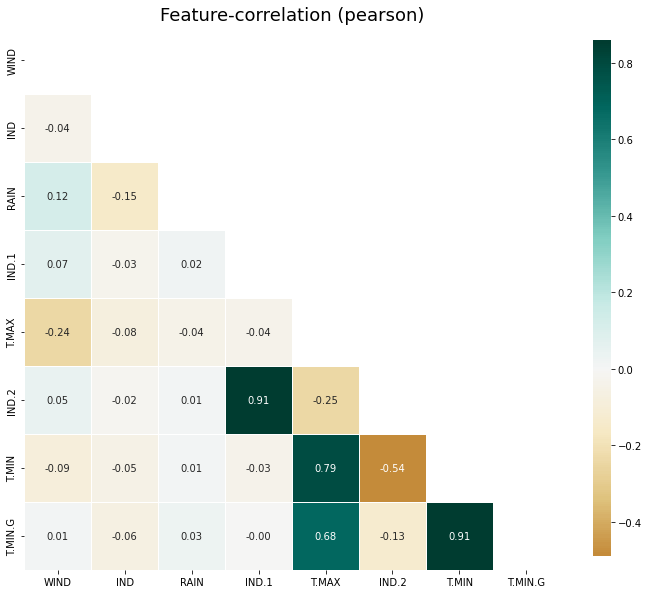

In [35]:
klib.corr_plot(dff)  # Visualize the corelations

#### Conclusion:
    >deep green shows the highly corelated features.
    


# Workig on Outlires

In [42]:
data.columns

Index(['DATE', 'WIND', 'IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN',
       'T.MIN.G'],
      dtype='object')

###### 'WIND'

<AxesSubplot:xlabel='WIND'>

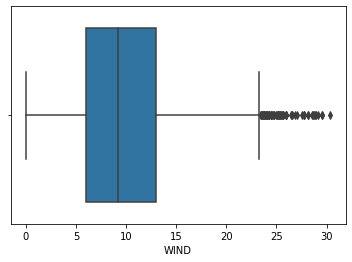

In [100]:
# Before
sns.boxplot(dataset['WIND'])

In [101]:
IQR_wind=dataset.WIND.quantile(0.75)-dataset.WIND.quantile(0.25)
IQR_wind

6.960000000000001

In [102]:
lower_Fence=dataset['WIND'].quantile(0.25)-(IQR_wind*1.5)
upper_Fence=dataset['WIND'].quantile(0.75)+(IQR_wind*1.5)
print(lower_Fence), print(upper_Fence)

-4.440000000000001
23.400000000000002


(None, None)

In [103]:
DF = dataset.copy()

In [104]:
DF.loc[dff['WIND']<=-4.440000000000001,'WIND']=--4.440000000000001
DF.loc[dff['WIND']>=23.400000000000002,'WIND']=23.400000000000002

<AxesSubplot:xlabel='WIND'>

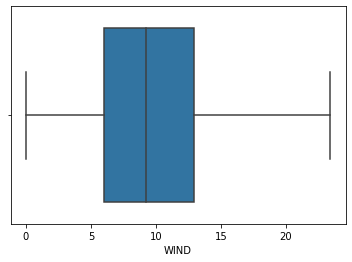

In [105]:
#After
sns.boxplot(DF['WIND'])

###### Conclusion :
    1. Outlier Gone
    2. Skewness is still there

### 'IND'

<AxesSubplot:xlabel='IND'>

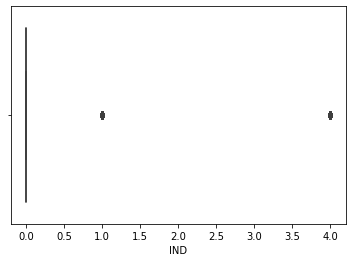

In [106]:
sns.boxplot(dataset['IND'])

In [107]:
IQR_ind=dataset['IND'].quantile(0.75)-dataset['IND'].quantile(0.25)
IQR_ind

0.0

In [108]:
lower_Fence_IND=dataset['IND'].quantile(0.25)-(IQR_ind*1.5)
upper_Fence_IND=dataset['IND'].quantile(0.75)+(IQR_ind*1.5)
print(lower_Fence_IND), print(upper_Fence_IND)

0.0
0.0


(None, None)

In [109]:
DF.loc[dff['IND']<=0.0,'IND']=0.0
DF.loc[dff['IND']>=0.0,'IND']=0.0

<AxesSubplot:xlabel='IND'>

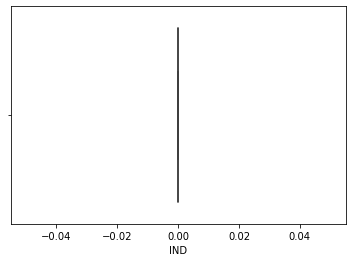

In [110]:
sns.boxplot(DF['IND'])

<AxesSubplot:xlabel='IND', ylabel='Count'>

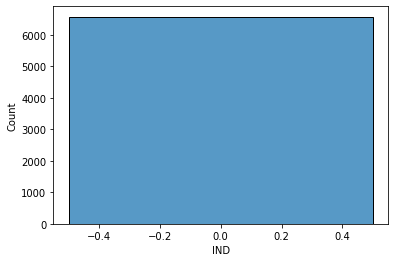

In [111]:
sns.histplot(DF['IND'])

<AxesSubplot:xlabel='IND', ylabel='Density'>

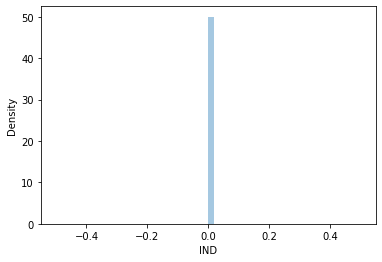

In [112]:
sns.distplot(DF['IND'])

#### 'RAIN'

<AxesSubplot:xlabel='RAIN'>

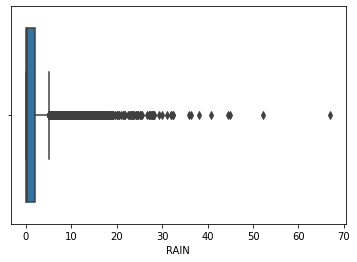

In [125]:
sns.boxplot(dataset.RAIN)

In [116]:
IQR_Rain=dataset['RAIN'].quantile(0.75)-dataset['RAIN'].quantile(0.25)
IQR_Rain

2.0

In [121]:
lower_Fence_Rain=dataset['RAIN'].quantile(0.25)-(IQR_Rain*1.5)
upper_Fence_Rain=dataset['RAIN'].quantile(0.75)+(IQR_Rain*1.5)

In [122]:
print(lower_Fence_Rain), print(upper_Fence_Rain)

-3.0
5.0


(None, None)

In [123]:
DF.loc[dff['RAIN']<=-3.0,'RAIN']=-3.0
DF.loc[dff['RAIN']>=5.0,'RAIN']=5.0

<AxesSubplot:xlabel='RAIN'>

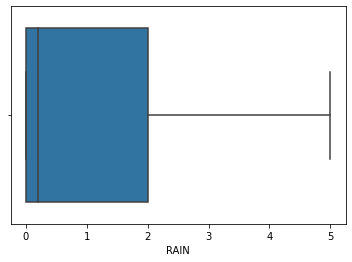

In [126]:
sns.boxplot(DF.RAIN)

##### observation :
    1.Outlires are gone 
    2. but heavely right skewed

<AxesSubplot:xlabel='RAIN', ylabel='Density'>

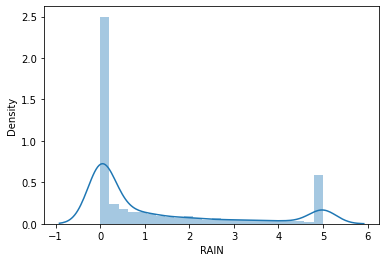

In [127]:
sns.distplot(DF.RAIN)

### 'IND.2'

<AxesSubplot:xlabel='IND.2'>

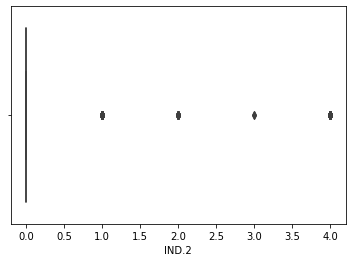

In [129]:
sns.boxplot(dataset['IND.2'])

In [128]:
IQR_ind2=dataset['IND.2'].quantile(0.75)-dataset['IND.2'].quantile(0.25)
IQR_ind2

0.0

In [130]:
lower_Fence_ind2=dataset['IND.2'].quantile(0.25)-(IQR_ind2*1.5)
upper_Fence_ind2=dataset['IND.2'].quantile(0.75)+(IQR_ind2*1.5)
print(lower_Fence_ind2), print(upper_Fence_ind2)

0.0
0.0


(None, None)

In [131]:
DF.loc[DF['IND.2']<=0.0,'IND.2']=0.0
DF.loc[DF['IND.2']>=0.0,'IND.2']=0.0

<AxesSubplot:xlabel='IND.2'>

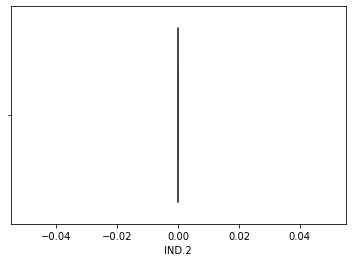

In [132]:
sns.boxplot(DF['IND.2'])

#### 'T.MIN'

<AxesSubplot:xlabel='T.MIN'>

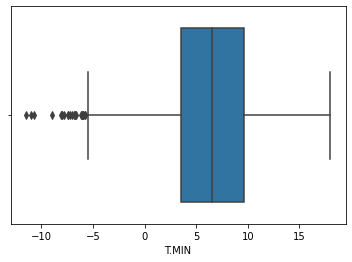

In [133]:
sns.boxplot(dataset['T.MIN'])

In [134]:
IQR_min=dataset['T.MIN'].quantile(0.75)-dataset['T.MIN'].quantile(0.25)
IQR_min

6.1

In [135]:
lower_Fence_min=dataset['T.MIN'].quantile(0.25)-(IQR_min*1.5)
upper_Fence_min=dataset['T.MIN'].quantile(0.75)+(IQR_min*1.5)
print(lower_Fence_min), print(upper_Fence_min)

-5.649999999999999
18.75


(None, None)

In [136]:
DF.loc[DF['T.MIN']<=-5.649999999999999,'T.MIN']=-5.649999999999999
DF.loc[DF['T.MIN']>=18.75,'T.MIN']=18.75

<AxesSubplot:xlabel='T.MIN'>

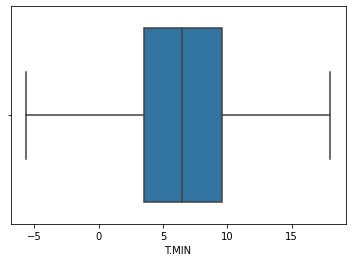

In [137]:
sns.boxplot(DF['T.MIN'])

#### 'T.MIN.G'

<AxesSubplot:xlabel='T.MIN.G'>

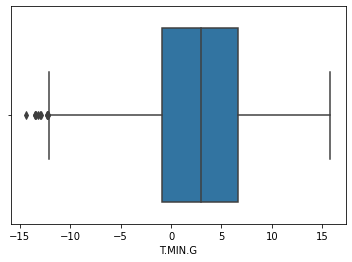

In [141]:
sns.boxplot(dataset['T.MIN.G'])

In [138]:
IQR_minG=dataset['T.MIN.G'].quantile(0.75)-dataset['T.MIN.G'].quantile(0.25)
IQR_minG

7.5

In [139]:
lower_Fence_minG=dataset['T.MIN.G'].quantile(0.25)-(IQR_minG*1.5)
upper_Fence_minG=dataset['T.MIN.G'].quantile(0.75)+(IQR_minG*1.5)
print(lower_Fence_minG), print(upper_Fence_minG)

-12.15
17.85


(None, None)

In [140]:
DF.loc[DF['T.MIN.G']<=-12.15,'T.MIN.G']=-12.15
DF.loc[DF['T.MIN.G']>=17.85,'T.MIN.G']=17.85

<AxesSubplot:xlabel='T.MIN.G'>

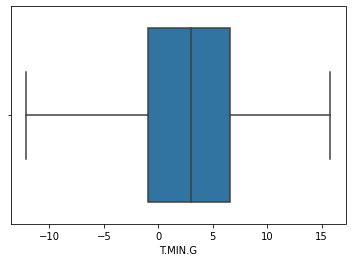

In [142]:
sns.boxplot(DF['T.MIN.G'])

In [143]:
DF.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,IND.1nan,T.MAXnan,IND.2nan,T.MINnan,T.MIN.Gnan
count,6574.000000,6574.0,6574.000000,6574.000000,6574.000000,6574.0,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000
mean,9.774372,0.0,1.234180,0.353057,13.335427,0.0,6.427221,2.752381,0.009279,0.094463,0.009279,0.102525,0.054761
std,4.906689,0.0,1.765546,1.123823,4.653806,0.0,4.372886,5.410796,0.095887,0.292494,0.095887,0.303361,0.227531
min,0.000000,0.0,0.000000,0.000000,-0.100000,0.0,-5.650000,-12.150000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.0,0.000000,0.000000,10.000000,0.0,3.500000,-0.900000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.210000,0.0,0.200000,0.000000,13.300000,0.0,6.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.960000,0.0,2.000000,0.000000,16.800000,0.0,9.600000,6.600000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.400000,0.0,5.000000,4.000000,26.800000,0.0,18.000000,15.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
DF.columns

Index(['DATE', 'WIND', 'IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN',
       'T.MIN.G', 'IND.1nan', 'T.MAXnan', 'IND.2nan', 'T.MINnan',
       'T.MIN.Gnan'],
      dtype='object')

In [148]:
DFF = DF.copy()

In [144]:
dataset.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,IND.1nan,T.MAXnan,IND.2nan,T.MINnan,T.MIN.Gnan
count,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000
mean,9.796834,0.391542,1.885169,0.353057,13.335427,0.460146,6.420733,2.750974,0.009279,0.094463,0.009279,0.102525,0.054761
std,4.977272,1.179092,4.030529,1.123823,4.653806,1.172940,4.393143,5.414849,0.095887,0.292494,0.095887,0.303361,0.227531
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,10.000000,0.000000,3.500000,-0.900000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.960000,0.000000,2.000000,0.000000,16.800000,0.000000,9.600000,6.600000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000,1.000000,1.000000,1.000000,1.000000,1.000000


##### observations
Compare the describtions of the dataset before cleaning and after cleaning

<AxesSubplot:xlabel='T.MAX'>

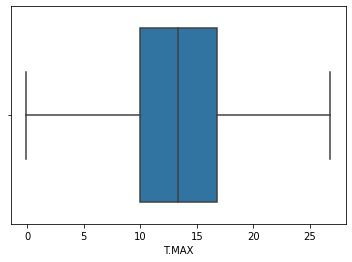

In [146]:
# outlires not present
sns.boxplot(dataset['T.MAX'])

In [149]:
DFF = DFF.drop(['IND.1nan', 'T.MAXnan', 'IND.2nan', 'T.MINnan',
       'T.MIN.Gnan'],axis=1)

In [151]:
DFF.isnull().sum()

DATE       0
WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

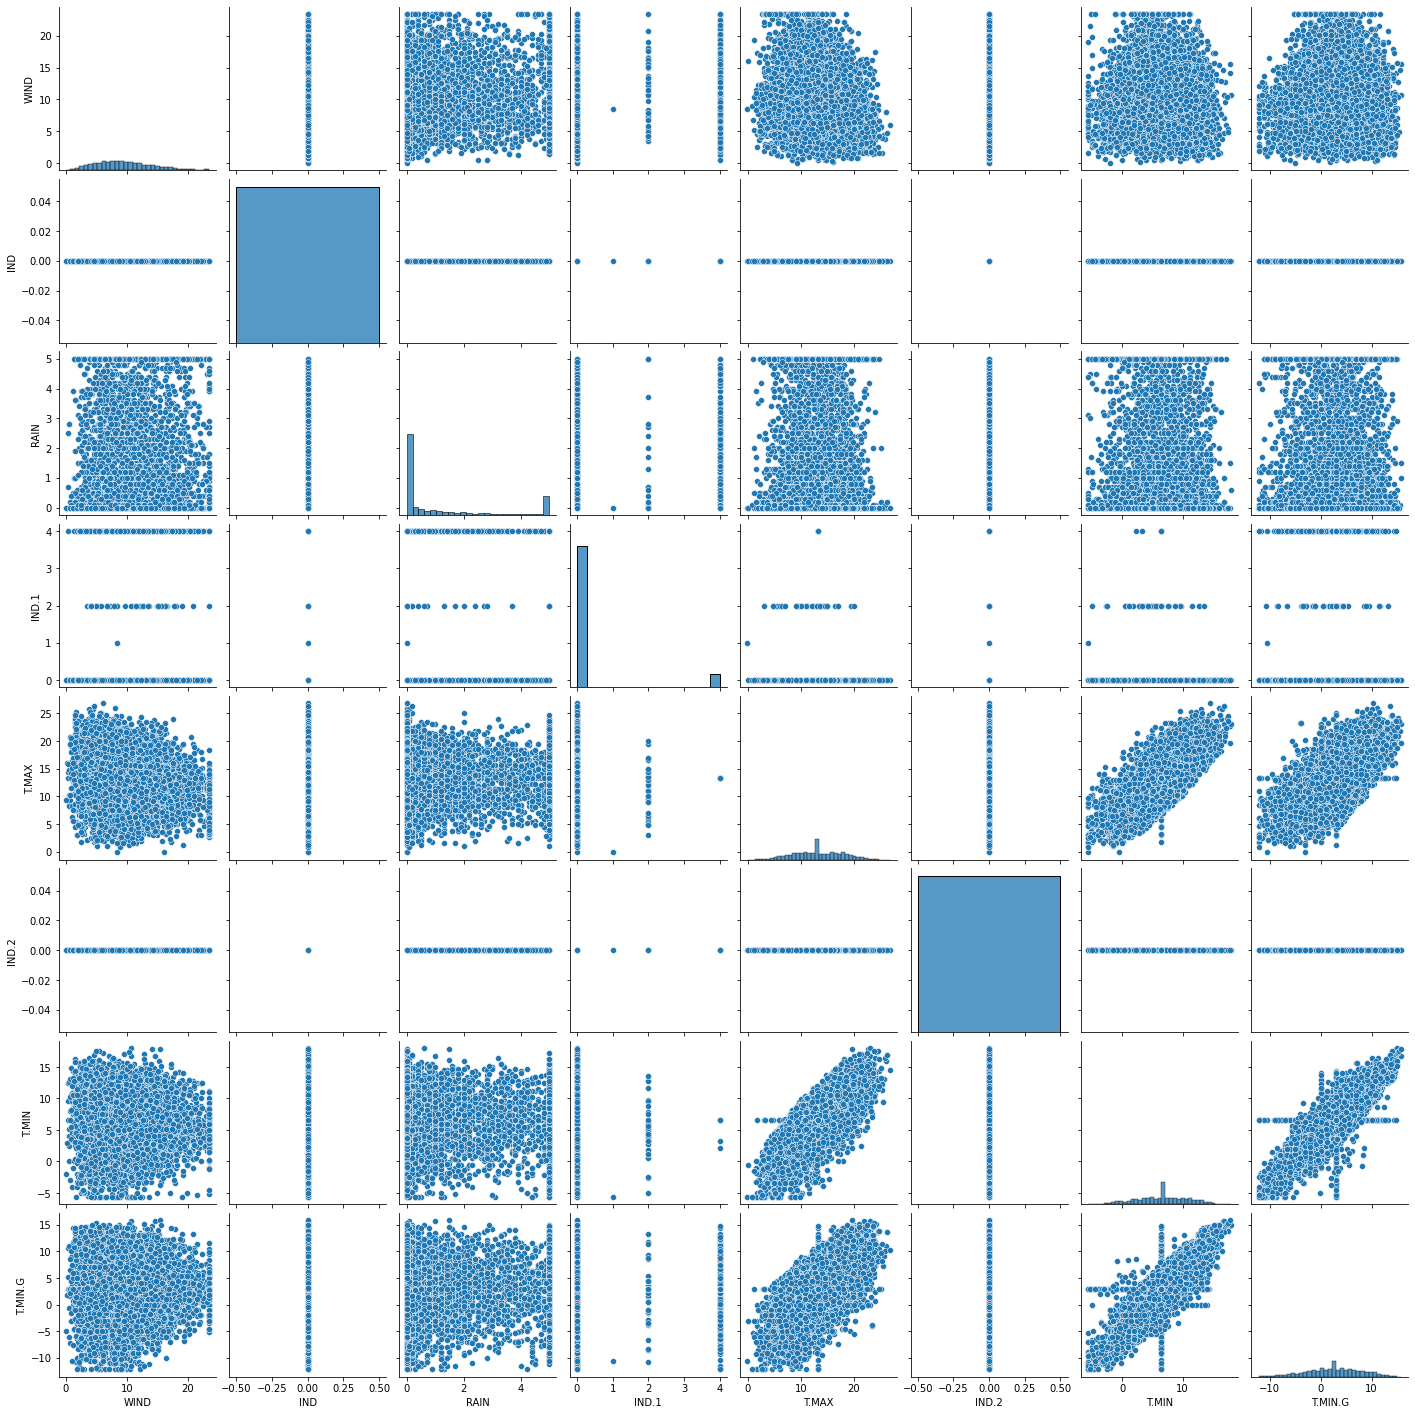

In [153]:
sns.pairplot(DFF)

In [154]:
DFF.to_csv("Clen_wind_Data_before_Transformation.csv")

## Feature Transformations

In [197]:
import scipy.stats as stat
import pylab 

In [198]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

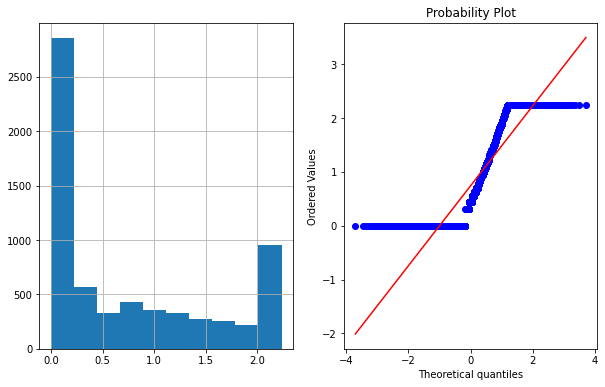

In [230]:
##### Square Root Transformation
df22['RAIN_sqaure']=df22.RAIN**(1/2)
plot_data(df22,'RAIN_sqaure')


In [186]:
DFF.RAIN

0       0.2
1       5.0
2       0.4
3       0.2
4       5.0
       ... 
6569    5.0
6570    5.0
6571    5.0
6572    4.9
6573    0.5
Name: RAIN, Length: 6574, dtype: float64

In [187]:
df22 = DFF.copy()
df22.RAIN

0       0.2
1       5.0
2       0.4
3       0.2
4       5.0
       ... 
6569    5.0
6570    5.0
6571    5.0
6572    4.9
6573    0.5
Name: RAIN, Length: 6574, dtype: float64

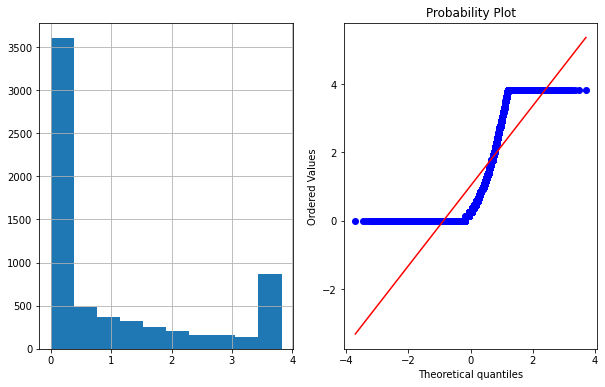

In [188]:
#### Exponential Transdormation
df22['RAIN_exponential']=df22.RAIN**(1/1.2)
plot_data(df22,'RAIN_exponential')

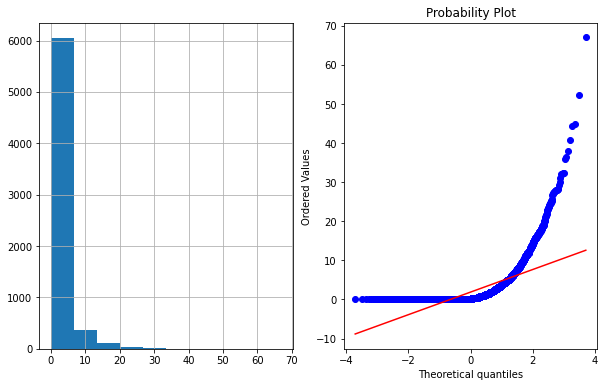

In [233]:
#### Rain
df34['RAIN']=np.log1p(df['RAIN'])
plot_data(df,'RAIN')

In [195]:
df44 = DFF.copy()

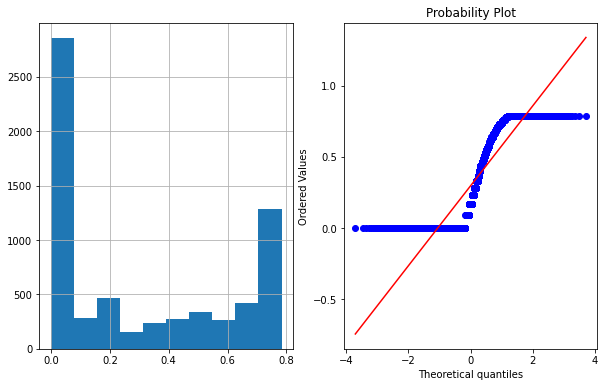

In [196]:
df44['RAIN_Boxcox'],parameters=stat.boxcox(df44['RAIN']+1)
plot_data(df44,'RAIN_Boxcox')

# conclusion
      Data is not Not Normally Distributed as we can see most of the data are not coinsides alogn with the red Line

### Thank you for taking your valuable time to read My work !! fell free to comment happy to learn from you.


# HAPPY LEARNING :)